<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Reto idealista, ¿cuánto vale mi piso?

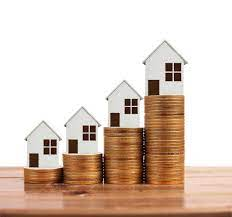


Notebook por: **David Rey**






# Carga de librerías

Cargamos las librerías en nuestro colab, como algunos paquetes no los tenemos instalados realizamos la instalación utilizando [pip](https://packaging.python.org/tutorials/installing-packages/).

In [101]:
#import pygeos
import geopandas
from geopandas import GeoDataFrame
from shapely import wkt
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from IPython.display import display, HTML

import sys
import importlib
# Añadir la ruta al directorio src para importar módulos personalizados
sys.path.append("../src")
# Unload the module if already loaded
if "idealista18.loader" in sys.modules:
    importlib.reload(sys.modules["idealista18.loader"])
else:
    import idealista18.loader as loader


# Carga de datos

## Datos de anuncios de idealista

### Anuncios de venta en Madrid

In [102]:
# Cargamos los datos de anuncios
anuncios_madrid = loader.load_data("Madrid")
anuncios_madrid.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,...,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
0,A15019136831406238029,201803,126000,2680.851064,HOME,SALE,47,1,1,0,...,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,Madrid,HOME,SALE
1,A6677225905472065344,201803,235000,4351.851852,HOME,SALE,54,1,1,0,...,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,Madrid,HOME,SALE
2,A13341979748618524775,201803,373000,4973.333333,HOME,SALE,75,2,1,0,...,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,Madrid,HOME,SALE
3,A4775182175615276542,201803,284000,5916.666667,HOME,SALE,48,1,1,0,...,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,Madrid,HOME,SALE
4,A2492087730711701973,201803,228000,4560.000000,HOME,SALE,50,0,1,0,...,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,Madrid,HOME,SALE


# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid

# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid

# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid

In [103]:
anuncios_madrid.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,...,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,2.922660,...,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.314865,...,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309735,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,3.000000,...,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


# Descriptivos básicos

## Densidad de precios

Mostramos la densidad de precios

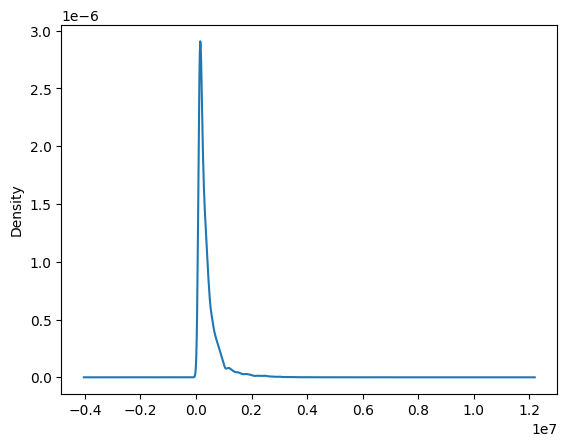

In [104]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.PRICE.plot.kde()
plt.show()

Realizamos una winsorización

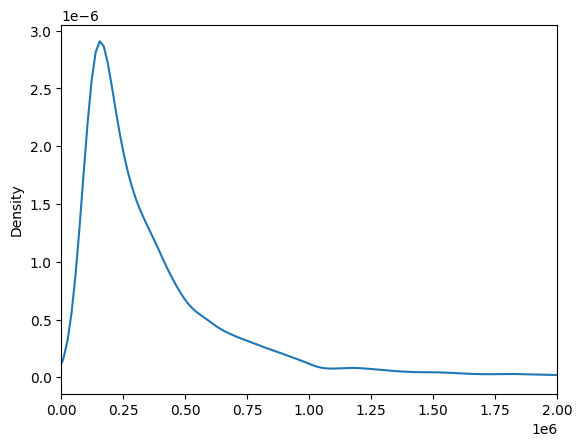

In [105]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.PRICE.plot.kde()
plt.xlim([0, 2000000])
plt.show()

Probamos a cambiar de escala el precio, en este caso sin realizar ninguna transformación

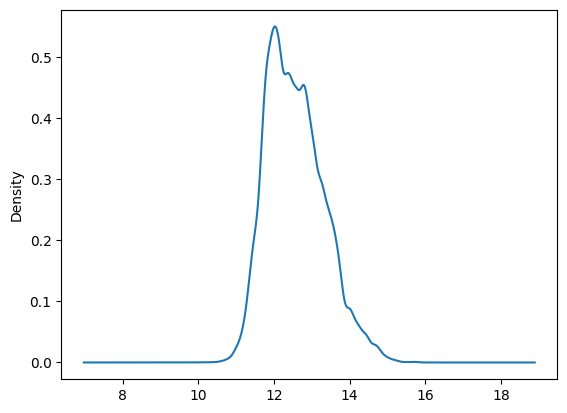

In [106]:
anuncios_madrid['LOGPRICE'] = np.log(anuncios_madrid['PRICE'])
ax = anuncios_madrid.LOGPRICE.plot.kde()
plt.show()

Temas a tener en cuenta:

* La distribución de valores es multimodal
* La distribución de valores no es simétrica
* El rango de valores puede ser muy amplio

El precio depende de muchos factores, pero en la literatura existen dos grandes factores:

* Precio del suelo (el suelo donde está construido)
* Precio del vuelo (lo que está construido)

Para empezar, una forma de controlar el precio del suelo es incorporar información de la zona y una forma para controla el precio del suelo es normalizar por metros cuadrados (es nuestra variable __UNITPRICE__).

En la siguiente gráfica observamos el fenómeno de la multimodalidad, significa que podemos encontrarnos inmuebles con las mismas características constructivas con distintos precios €/m², ¿por qué?, principalmente por el otro factor: __el precio del suelo__.

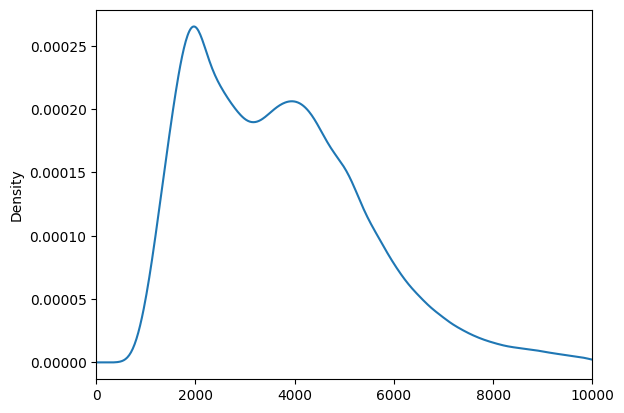

In [107]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.UNITPRICE.plot.kde()
plt.xlim([0, 10000])
plt.show()

Mostramos los valores para Barcelona

In [108]:
#
# Función de densidad de precios en Barcelona  de 0 a 1M€
#
ax = anuncios_barcelona.PRICE.plot.kde()
plt.xlim([0, 1000000])
plt.show()


NameError: name 'anuncios_barcelona' is not defined

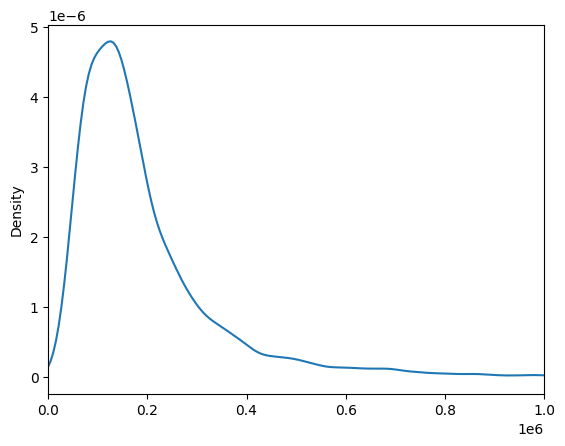

In [ ]:
#
# Función de densidad de precios en Valencia  de 0 a 1M€
#
ax = anuncios_valencia.PRICE.plot.kde()
plt.xlim([0, 1000000])
plt.show()

## Coordenadas
Mostramos las coordenadas sin proyectar del dataset como un scatterplot, usamos distintas intensidades de color para representar el nivel de precios.

Si vemos alguna anomalía en las coordenadas de alguna observación deberíamos eliminarla

### Madrid

Precio total en euros

/var/folders/qm/yg0gm8013rgblsl2prhg8jq00000gn/T/ipykernel_12391/763296802.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice
/var/folders/qm/yg0gm8013rgblsl2prhg8jq00000gn/T/ipykernel_12391/763296802.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


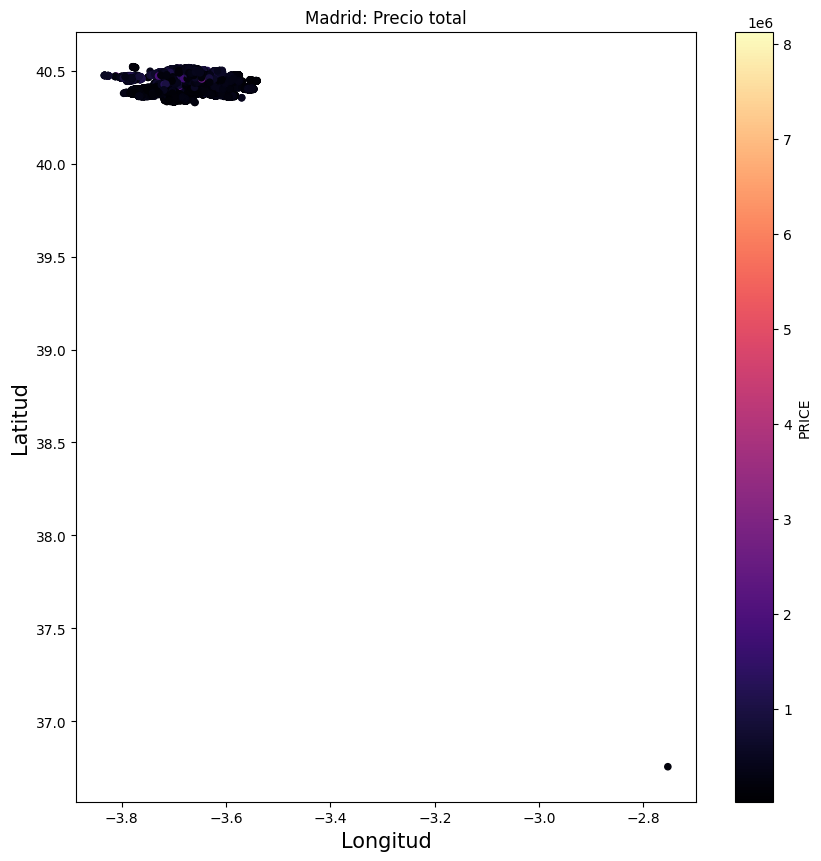

In [ ]:
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_madrid.plot.scatter(x='LONGITUDE', y='LATITUDE', c='PRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Madrid: Precio total')
ax.figure.show()

Precio €/m²

El caso de Madrid está afectado por valores atípicos en las coordenadas, usamos un criterio estadístico de exclusión sobre una medida estadística robusta como valor medio (la mediana). Usamos un "zscore" muy alto (5)

/var/folders/qm/yg0gm8013rgblsl2prhg8jq00000gn/T/ipykernel_12391/2264747443.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice
/var/folders/qm/yg0gm8013rgblsl2prhg8jq00000gn/T/ipykernel_12391/2264747443.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


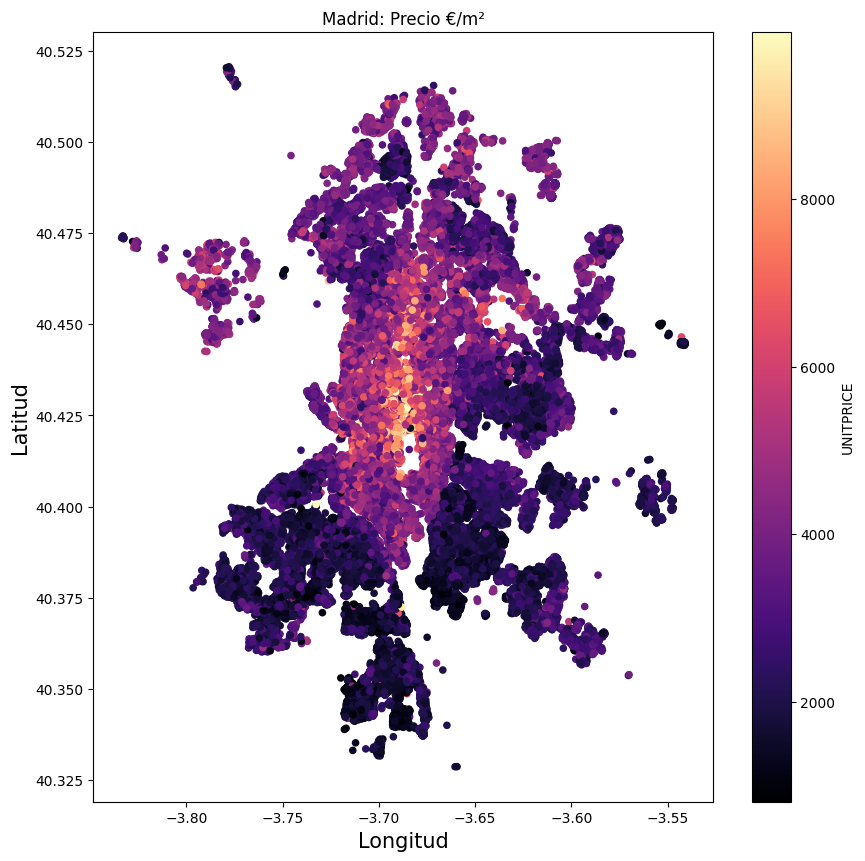

In [ ]:
#
# Las coordenadas tienen algun dato anómalo, podemos eliminarlas usando un criterio estadístico
# sobre las variables de latitud y longitud.
# Usamos un z-score exagerado para eliminar los puntos más alejados de la media
# También usamos la mediana de las coordenadas para evitar que los outliers afecten a la media
#
anuncios_madrid_clean = loader.remove_geo_outliers(anuncios_madrid, zscore=5)

#
# Alternativamente, podemos eliminar los puntos que están fuera de un rango de coordenadas
#anuncios_madrid_clean = anuncios_madrid[anuncios_madrid['LATITUDE'] >= 40.2]
#anuncios_madrid_clean = anuncios_madrid[anuncios_madrid['LONGITUDE'] <= -3.4]
#
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_madrid_clean.plot.scatter(x='LONGITUDE', y='LATITUDE', c='UNITPRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Madrid: Precio €/m²')
ax.figure.show()

# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid

Ahora trabajaremos con el mismo dataframe pero con columnas geométricas, usaremos 2 geometrías:

* Polígonos (Zonas)
* Puntos (anuncios o POIs)

In [ ]:
#
# Cargamos tres conjuntos de datos geográficos
#
#   1. Polígonos de zona
#
gdf_idealista_areas = loader.load_geo_idealista_zones(city_name="Madrid", use_geopandas=True)
gdf_census_areas = loader.load_geo_census_areas(city_name="Madrid", use_geopandas=True)

#
#   2. Puntos de interés de OSM
#
gdf_osm_poi = loader.load_osm_data("Madrid", use_geopandas=True)


#
#   3. Anuncios para lo que convertimos los anuncios a un GeoDataFrame de geopandas
# 
gdf_ads = loader.convert_ads_to_geopandas(anuncios_madrid_clean)



In [ ]:
# Podemos ver que son dataframes "normales" con una columna de geometría
gdf_osm_poi.head(10)

,ID,NOMBRE,CODE,SUBCODE,geometry
0,327897,Tanatorio San Isidro,SHOP,DEPARTMENTSTORE,POINT (-3.72358 40.39784)
1,327920,Parroquia San Francisco de Sales,POW,CHRISTIAN,POINT (-3.70376 40.45455)
2,328201,Parroquia Nuestra Señora de Las Rosas,POW,CHRISTIAN,POINT (-3.60368 40.42474)
3,328303,Parroquia Santa María de la Caridad,POW,CHRISTIAN,POINT (-3.70431 40.48451)
4,328304,Colegio Público Lorenzo Luzuriaga,EDUCATION,SCHOOL,POINT (-3.70544 40.48519)
5,328482,Hospital Universitario HM Madrid,HEALTH,HOSPITAL,POINT (-3.70663 40.43128)
6,328609,Delicias,TRANSPORT,STATION,POINT (-3.69173 40.39988)
7,328610,Escuela Infantil El Tren de la Fresa,EDUCATION,NURSERY,POINT (-3.68845 40.39906)
8,328733,Parroquia de Santa María la Mayor,POW,CHRISTIAN,POINT (-3.70566 40.45766)
9,328746,Centro Deportivo Municipal Fuente del Berro,SPORT,SWIMMING,POINT (-3.66536 40.42116)


Mostramos los anuncios en las distintas zonas 

<Axes: >

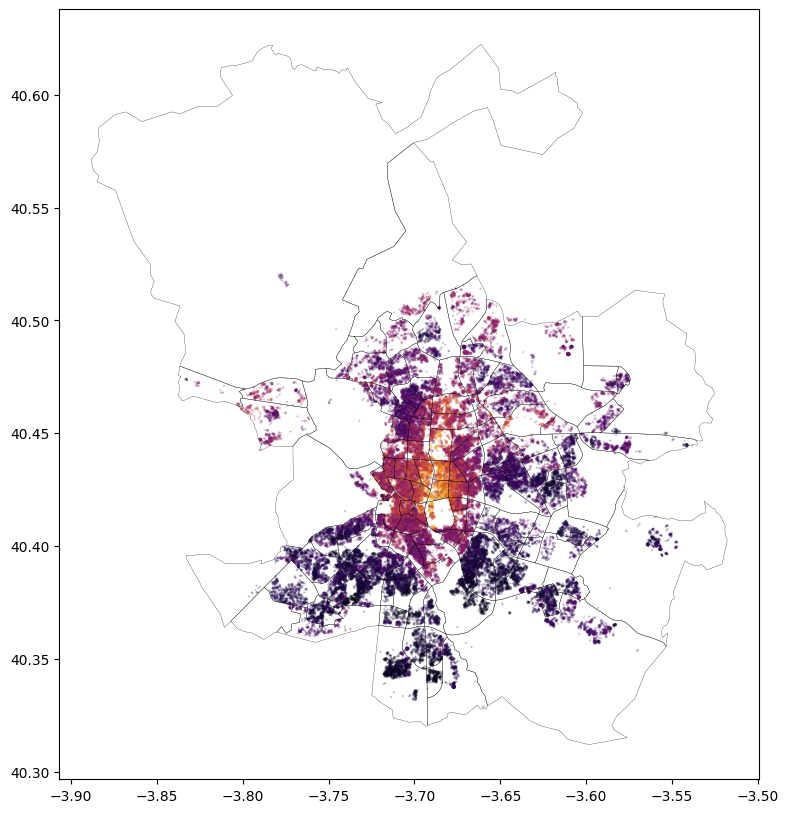

In [ ]:
base = gdf_ads.plot(marker='o', column='UNITPRICE', markersize=0.5, cmap='inferno', alpha=0.2, figsize=(10, 10))
gdf_idealista_areas.plot(ax=base, facecolor='none', edgecolor='black', linewidth=0.2, figsize=(10, 10))

Ahora hacemos lo mismo pero con los POI y las secciones censales, como hay muchos tipos

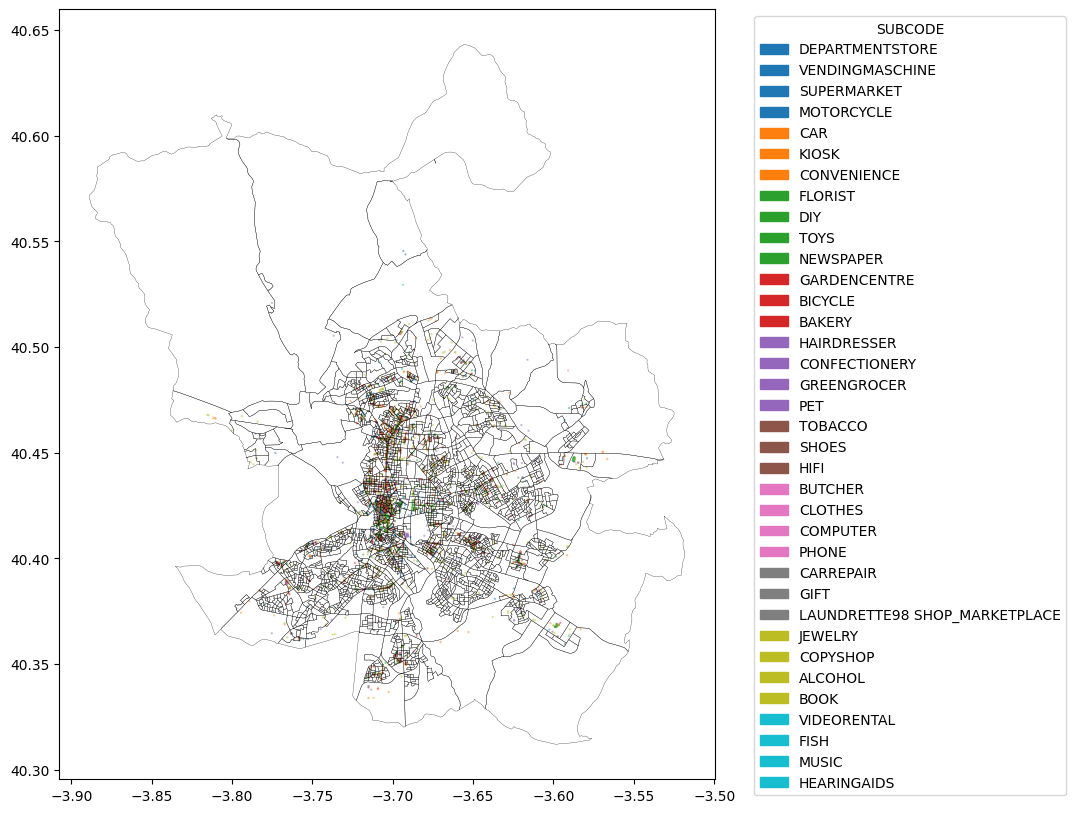

In [ ]:
import matplotlib.patches as mpatches

# Fitramos los tipo shop
gdf_osm_poi_shops = gdf_osm_poi[gdf_osm_poi['CODE'] == 'SHOP']

# Plot the POIs by SUBCODE
base = gdf_osm_poi_shops.plot(marker='o', column='SUBCODE', markersize=0.5, alpha=0.4, figsize=(10, 10), legend=False)
gdf_census_areas.plot(ax=base, facecolor='none', edgecolor='black', linewidth=0.2, figsize=(10, 10))

# Create a legend for SUBCODE
subcodes = gdf_osm_poi_shops['SUBCODE'].unique()
colors = base.collections[0].cmap(base.collections[0].norm(gdf_osm_poi_shops['SUBCODE'].astype('category').cat.codes))
patches = [mpatches.Patch(color=base.collections[0].cmap(base.collections[0].norm(i)), label=subcode)
           for i, subcode in enumerate(subcodes)]
base.legend(handles=patches, title="SUBCODE", bbox_to_anchor=(1.05, 1), loc='upper left')

## Enriquecimiento espacial

Es muy interesante tener la columna código de zona en el dataset de anuncios, lo que vamos a hacer es un cruce espacial entre el dataset de anuncios y los dos tipos de zona

In [123]:
# 3. Perform a spatial join: for each ad‐point, find which idealista‐area polygon it falls into.
#    By default, sjoin creates an "index_right" column pointing back to the index of gdf_idealista_areas.
gdf_ads_with_areas = geopandas.sjoin(
    gdf_ads,
    gdf_idealista_areas,
    how="inner",        # only keep ads that actually fall in one of the idealista areas
    predicate="within"  # "within" means the ad's point must lie inside the polygon
)

# 4. Now gdf_ads_with_areas has all the original ad‐columns (including 'PRICE') plus
#    an integer column 'index_right' that tells you which row of gdf_idealista_areas each ad matched.
#
#    If you had any columns in gdf_idealista_areas that you care about (like an 'area_id' or 'name'),
#    they'd also be duplicated into gdf_ads_with_areas. But we only need index_right for aggregation.

# 5. Group by that index_right, compute mean PRICE:
mean_by_area = (
    gdf_ads_with_areas
    .groupby("index_right")["PRICE"]
    .mean()
    .rename("mean_price")
    # This produces a Series indexed by `index_right`, with the average price of all ads in that polygon.
)

# 6. Merge the mean back onto gdf_idealista_areas, using its integer index:
gdf_mean_price = gdf_idealista_areas.merge(
    mean_by_area,
    left_index=True,
    right_index=True,
    how="inner"   # only keep areas that had at least one ad. Use "left" if you want all areas (NaN where no ads).
)

# 7. gdf_mean_price is now a GeoDataFrame with the same geometry as gdf_idealista_areas,
#    plus a column "mean_price" containing the average PRICE for that area’s ads.
print(gdf_mean_price.head())

                                            geometry  \
0  MULTIPOLYGON (((-3.63014 40.44939, -3.62633 40...   
1  MULTIPOLYGON (((-3.6551 40.46681, -3.65425 40....   
2  MULTIPOLYGON (((-3.58174 40.47972, -3.60157 40...   
3  MULTIPOLYGON (((-3.72044 40.42028, -3.72097 40...   
4  MULTIPOLYGON (((-3.69649 40.41881, -3.69968 40...   

                     LOCATIONID         LOCATIONNAME     mean_price  
0  0-EU-ES-28-07-001-079-16-002  Conde Orgaz-Piovera  893700.288184  
1  0-EU-ES-28-07-001-079-16-004        Pinar del Rey  271164.583333  
2  0-EU-ES-28-07-001-079-21-004                Timón  270597.765363  
3  0-EU-ES-28-07-001-079-01-001              Palacio  524512.208657  
4  0-EU-ES-28-07-001-079-01-003       Huertas-Cortes  682833.486661  


Vemos como ya el ejemplo tiene los datos

<Axes: >

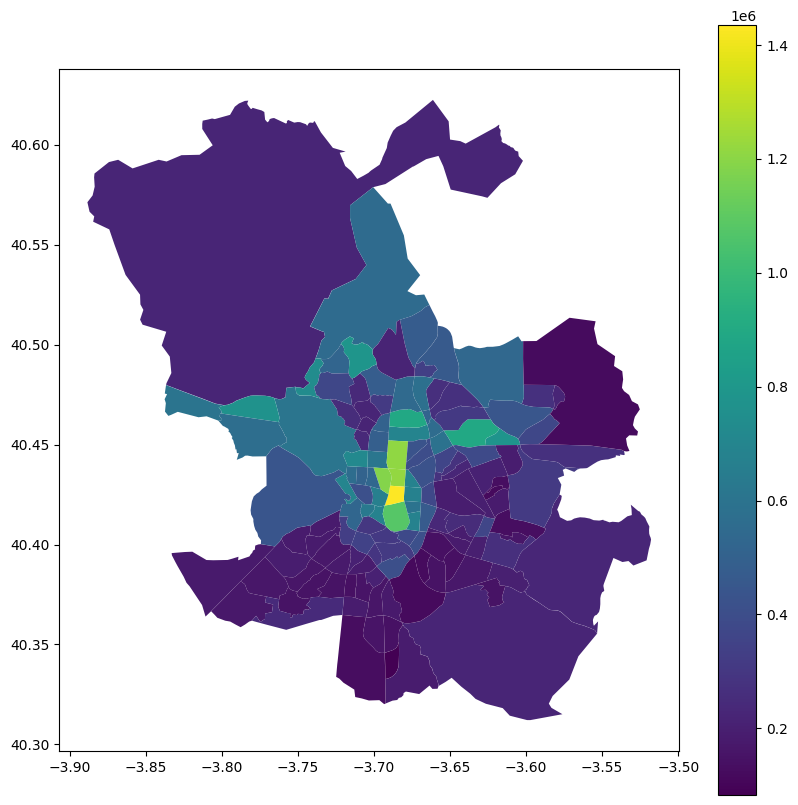

In [125]:
gdf_mean_price.plot(column="mean_price", cmap="viridis", legend=True, figsize=(10, 10))

Hacemos lo mismo para secciones censales

In [127]:
# 3. Perform a spatial join: for each ad‐point, find which idealista‐area polygon it falls into.
#    By default, sjoin creates an "index_right" column pointing back to the index of gdf_idealista_areas.
gdf_ads_with_areas = geopandas.sjoin(
    gdf_ads,
    gdf_census_areas,
    how="inner",        # only keep ads that actually fall in one of the idealista areas
    predicate="within"  # "within" means the ad's point must lie inside the polygon
)

# 4. Now gdf_ads_with_areas has all the original ad‐columns (including 'PRICE') plus
#    an integer column 'index_right' that tells you which row of gdf_idealista_areas each ad matched.
#
#    If you had any columns in gdf_idealista_areas that you care about (like an 'area_id' or 'name'),
#    they'd also be duplicated into gdf_ads_with_areas. But we only need index_right for aggregation.

# 5. Group by that index_right, compute mean PRICE:
mean_by_area = (
    gdf_ads_with_areas
    .groupby("index_right")["PRICE"]
    .mean()
    .rename("mean_price")
    # This produces a Series indexed by `index_right`, with the average price of all ads in that polygon.
)

# 6. Merge the mean back onto gdf_idealista_areas, using its integer index:
gdf_mean_price = gdf_idealista_areas.merge(
    mean_by_area,
    left_index=True,
    right_index=True,
    how="inner"   # only keep areas that had at least one ad. Use "left" if you want all areas (NaN where no ads).
)

# 7. gdf_mean_price is now a GeoDataFrame with the same geometry as gdf_idealista_areas,
#    plus a column "mean_price" containing the average PRICE for that area’s ads.
print(gdf_mean_price.head())

                                            geometry  \
0  MULTIPOLYGON (((-3.63014 40.44939, -3.62633 40...   
1  MULTIPOLYGON (((-3.6551 40.46681, -3.65425 40....   
2  MULTIPOLYGON (((-3.58174 40.47972, -3.60157 40...   
3  MULTIPOLYGON (((-3.72044 40.42028, -3.72097 40...   
4  MULTIPOLYGON (((-3.69649 40.41881, -3.69968 40...   

                     LOCATIONID         LOCATIONNAME     mean_price  
0  0-EU-ES-28-07-001-079-16-002  Conde Orgaz-Piovera  869587.412587  
1  0-EU-ES-28-07-001-079-16-004        Pinar del Rey  416561.224490  
2  0-EU-ES-28-07-001-079-21-004                Timón  573213.872832  
3  0-EU-ES-28-07-001-079-01-001              Palacio  537636.363636  
4  0-EU-ES-28-07-001-079-01-003       Huertas-Cortes  701785.185185  


<Axes: >

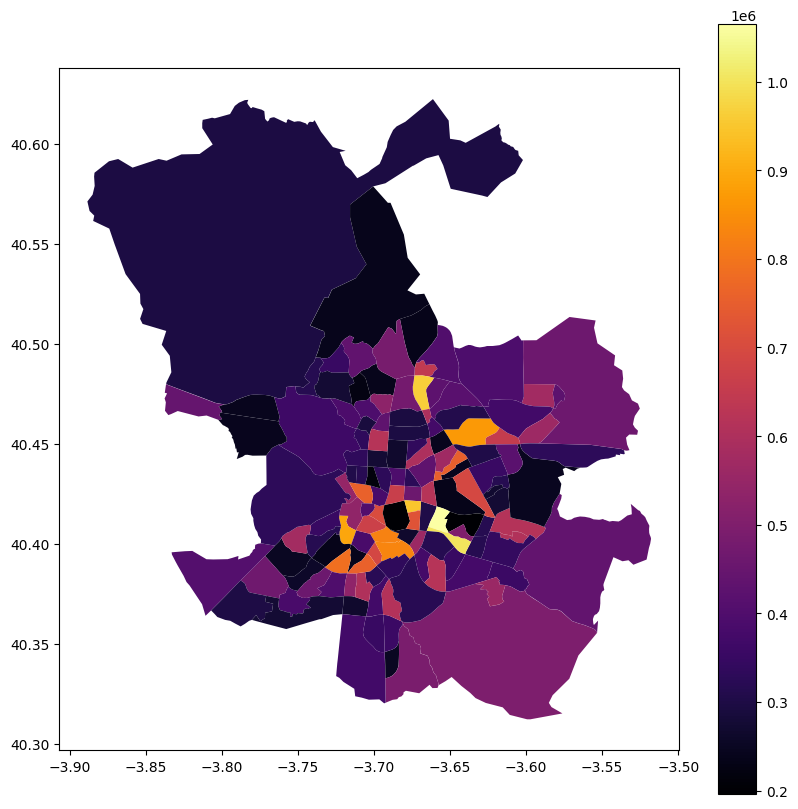

In [129]:
gdf_mean_price.plot(column="mean_price", cmap="inferno", legend=True, figsize=(10, 10))

# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid